<a href="https://colab.research.google.com/github/HasnainTariq1/CNN-Handwritten-Digit-Classification/blob/main/CNN_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist
from time import time
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [9]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

# Dataset Display

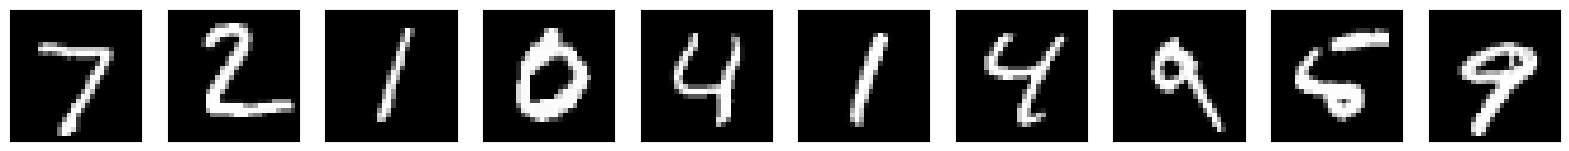

In [4]:
import matplotlib.pyplot as plt

#Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20,4))

# Loop through the first 'n' images
for i in range(n):
  # Create a subplot within the figure
  ax= plt.subplot(2, n, i+1)

  # Display the original image
  plt.imshow(X_test[i].reshape(28,28))

  # Set colormap to grayscale
  plt.gray()

  #Hide X-axis and y-axis labels and ticks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()


# Close the figure
plt.close()



# Dataset Shape

In [10]:
print("X_train Shape: ",X_train.shape)
print("Y_train Shape: ",Y_train.shape)
print("X_test Shape: ",X_test.shape)
print("Y_test Shape: ",Y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


# Reshaping Data

In [11]:
# Reshape training data to (number of samples, 28, 28, 1) for grayscale images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Reshape test data to (number of samples, 28, 28, 1) for grayscale images
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Print the shapes to confirm the correct format
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


# Min-Max Scalling

In [12]:
# Convert the data type of the images to float32 for better precision
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

# Normalize the pixel values to be between 0 and 1 (0 = black, 1 = white)
X_train /=255
X_test /=255

#One Hot Encoding

In [13]:
# Reshape labels using one-hot encoding for multi-class classification (e.g., digits 0–9)
number_of_classes=10

# Convert training and test labels to one-hot encoded format
Y_train = to_categorical(Y_train, number_of_classes)
Y_test = to_categorical(Y_test, number_of_classes)

#Building CNN

In [14]:
# Define the dimensions of the input image (height, width, channels)
img_rows, img_cols, channels=28, 28, 1

# Define the number of filters for each CNN layer
filters=[6, 32, 80, 120]


# Define the number of classes for classification (e.g., digits 0–9)
classes=10

#Creating Model

In [15]:
# Initialize a sequential model
model = Sequential()

# Add the first convolutional layer with ReLU activation and same padding
# Input shape is defined as (28, 28, 1) for grayscale images
model.add(Conv2D(filters[0],(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,channels)))
# Add a max pooling layer to reduce the image size and extract key features
model.add(MaxPooling2D((2,2))) #reducing image size


# Add the second convolutional layer
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters[2],(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))

# Add the fourth convolutional layer
model.add(Conv2D(filters[3],(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten the output to convert 2D matrices into a 1D vector
model.add(Flatten())

# Add a dense (fully connected) layer with 64 units and ReLU activation
model.add(Dense(64,activation='relu'))

# Add the final output layer with 'softmax' activation for multi-class classification
model.add(Dense(classes,activation='softmax'))

# Define the optimizer with SGD, a learning rate of 0.01, and momentum of 0.9
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with categorical cross-entropy loss and accuracy as a metric
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer=opt)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 80)            │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 120)           │          38,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,094 (226.93 KB)

 Trainable params: 58,094 (226.93 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Record the current time to measure training time
tic = time()

#Fit the mdoel on the training data
model.fit(X_train, Y_train,validation_split=0.2, batch_size=64, epochs=10, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print(f"Model training took {toc - tic } secs")




Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6325 - loss: 1.1106 - val_accuracy: 0.9717 - val_loss: 0.0920
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9681 - loss: 0.1021 - val_accuracy: 0.9730 - val_loss: 0.0867
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0689 - val_accuracy: 0.9823 - val_loss: 0.0563
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9793 - val_loss: 0.0639
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9858 - val_loss: 0.0497
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9861 - val_loss: 0.0482
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9867 - val_loss: 0.0472
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.

#Testing the Model

In [17]:
# Predict the probabilities for the test set using the trained model
y_pred_probs= model.predict(X_test, verbose=0)

# Convert probabilities to binary predictions (1 if probability > 0.5, else 0)
y_pred=np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print(f"\nTest accuracy: {test_accuracy}")


Test accuracy: 0.9869


In [18]:
# Select the first 20 samples from the test set for visualization
X_valid= X_test[0:20]

# Predict probabilities for the selected validation samples using the trained model
y_pred_probs_valid= model.predict(X_valid)

# Convert predicted probabilities to binary predictions (1 if probability > 0.5, else 0)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step


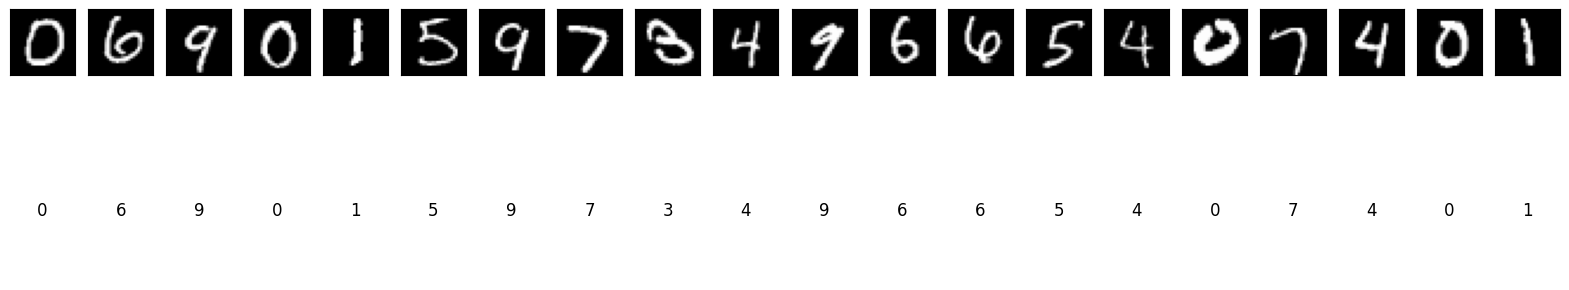

In [19]:
# Set up a figure to display imagees
n= len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
  # Display the original Image
  ax= plt.subplot(2, n, i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display the predicted digit
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i+1 +n)
  plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
  plt.axis('off')

#Show the plotted images
plt.show()


#close the plot
plt.close()